<a href="https://colab.research.google.com/github/elanozturk/python/blob/main/Hafta_11_Ders_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#23.01.2024 Salı 21.Ders

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("score.csv")
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [11]:
x = df[["Hours"]]
y = df["Scores"]
lr = LinearRegression()
model = lr.fit(x,y)

In [16]:
model.predict([[8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81.0741227])

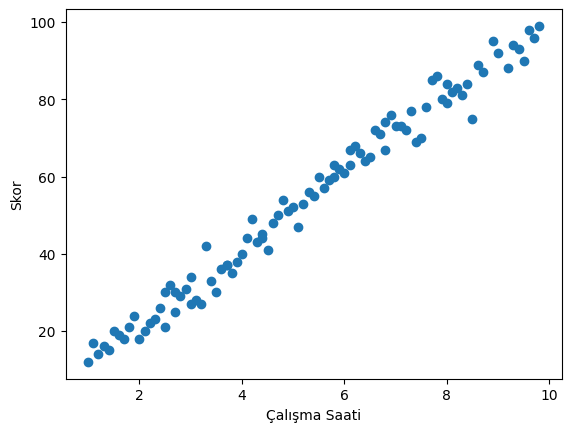

In [9]:
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Çalışma Saati")  # X ekseni etiketi
plt.ylabel("Skor")  # Y ekseni etiketi
plt.show()


In [14]:
model.score(x,y)


0.9813673346564977

In [18]:
model.predict(df[["Hours"]])

array([26.61687228, 52.36029975, 33.54779506, 86.02478183, 36.51819054,
       16.71555402, 92.95570461, 56.32082705, 84.04451818, 28.59713593,
       78.10372722, 60.28135436, 46.41950879, 34.53792688, 12.75502671,
       89.98530914, 26.61687228, 20.67608132, 62.26161801, 75.13333175,
       28.59713593, 49.38990427, 39.48858601, 70.18267262, 79.09385905,
       43.44911332, 95.92610009, 59.29122253, 24.63660862, 48.39977245,
       17.70568584, 90.97544096, 63.25174984, 82.06425453, 40.47871784,
       23.6464768 , 72.16293627, 64.24188166, 54.3405634 , 45.42937697,
       19.68594949, 94.93596827, 68.20240897, 38.49845419, 74.14319992,
       42.45898149, 81.0741227 , 32.55766323, 14.73529037, 58.30109071,
       29.58726775, 80.08399088, 67.21227714, 37.50832236, 25.62674045,
       47.40964062, 85.03465001, 18.69581767, 53.35043158, 65.23201349,
       77.1135954 , 93.94583644, 35.52805871, 22.65634497, 55.33069523,
       83.05438635, 15.72542219, 96.91623192, 69.19254079, 76.12

In [27]:
df["tahmin"] = model.predict(df[["Hours"]])

In [28]:
df

,Hours,Scores,tahmin,sapma,SapmaOranı,BaşarıOranı
0,2.5,21,26.616872,-5.616872,73.252989,73.252989
1,5.1,47,52.360300,-5.360300,88.595107,88.595107
2,3.2,27,33.547795,-6.547795,75.748907,75.748907
3,8.5,75,86.024782,-11.024782,85.300291,85.300291
4,3.5,30,36.518191,-6.518191,78.272698,78.272698
...,...,...,...,...,...,...
91,5.8,60,59.291223,0.708777,98.818704,98.818704
92,4.4,44,45.429377,-1.429377,96.751416,96.751416
93,6.1,63,62.261618,0.738382,98.827965,98.827965
94,3.7,37,38.498454,-1.498454,95.950124,95.950124


In [29]:
df["sapma"] = df["Scores"] - df["tahmin"]
df.head(3)

,Hours,Scores,tahmin,sapma,SapmaOranı,BaşarıOranı
0,2.5,21,26.616872,-5.616872,73.252989,73.252989
1,5.1,47,52.360300,-5.360300,88.595107,88.595107
2,3.2,27,33.547795,-6.547795,75.748907,75.748907


In [35]:
del df["BaşarıOranı"] #Sütun Silme

In [37]:
df["BaşarıOranı"] = (1-abs(df["sapma"]) / df["Scores"]) * 100
df

,Hours,Scores,tahmin,sapma,BaşarıOranı
0,2.5,21,26.616872,-5.616872,73.252989
1,5.1,47,52.360300,-5.360300,88.595107
2,3.2,27,33.547795,-6.547795,75.748907
3,8.5,75,86.024782,-11.024782,85.300291
4,3.5,30,36.518191,-6.518191,78.272698
...,...,...,...,...,...
91,5.8,60,59.291223,0.708777,98.818704
92,4.4,44,45.429377,-1.429377,96.751416
93,6.1,63,62.261618,0.738382,98.827965
94,3.7,37,38.498454,-1.498454,95.950124


In [ ]:
#Lojistik Regresyon

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #Lojistik Regresyon

df = pd.read_csv("drug.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [63]:
df = pd.get_dummies(df,columns=["Sex","BP","Cholesterol"],drop_first=True)

In [64]:
df.head(10)

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
5,22,8.607,drugX,0,0,1,0
6,49,16.275,DrugY,0,0,1,0
7,41,11.037,drugC,1,1,0,0
8,60,15.171,DrugY,1,0,1,0
9,43,19.368,DrugY,1,1,0,1


In [65]:
# x = df[["Age","Na_to_K","Sex_M","BP_LOW","BP_NORMAL","Cholesterol_NORMAL"]]
x = df.drop("Drug",axis=1)
y = df["Drug"]
log = LogisticRegression()
model = log.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
model.score(x,y)

0.89

In [67]:
df.head(3)

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0


In [68]:
model.predict([[22,15.4,1,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['DrugY'], dtype=object)

In [69]:
model.predict([[45,15.4,0,1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['drugX'], dtype=object)

In [70]:
model.score(x,y)

0.89

In [ ]:
#Decision Tree - Karar Ağacı

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #Karar Ağacı


In [72]:
tree = DecisionTreeClassifier()
model= tree.fit(x,y)
model.predict([[45,25.4,0,0,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['DrugY'], dtype=object)

In [73]:
model.score(x,y)

1.0

In [ ]:
#Overfitting <<Aşırı Öğrenme>>


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #Karar Ağacı
from sklearn.model_selection import train_test_split #Eğitim ve Test Verisini Parçalama

In [76]:
df

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=9) #Yüzde

In [101]:
x_train

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
146,37,12.006,0,1,0,1
169,20,11.262,0,0,0,0
145,61,9.443,1,0,1,0
55,26,14.160,0,1,0,0
21,63,25.917,1,0,1,0
...,...,...,...,...,...,...
56,65,11.340,1,0,0,1
182,20,11.686,0,1,0,1
199,40,11.349,0,1,0,1
92,29,29.450,0,0,0,0


In [102]:
tree = DecisionTreeClassifier()
model = tree.fit(x_train,y_train)

In [103]:
model.score(x_test,y_test)

1.0

In [123]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [124]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [125]:
df = df[["survived","pclass","age","sibsp","parch","fare","embark_town","who"]]
df.head(3)

,survived,pclass,age,sibsp,parch,fare,embark_town,who
0,0,3,22.0,1,0,7.2500,Southampton,man
1,1,1,38.0,1,0,71.2833,Cherbourg,woman
2,1,3,26.0,0,0,7.9250,Southampton,woman


In [126]:
df["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [127]:
df = pd.get_dummies(df,columns=["embark_town","who"],drop_first=True)

In [128]:
df.head(3)

,survived,pclass,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton,who_man,who_woman
0,0,3,22.0,1,0,7.2500,0,1,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,1,0,1


In [133]:
df = df.dropna()

In [134]:
df

,survived,pclass,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton,who_man,who_woman
0,0,3,22.0,1,0,7.2500,0,1,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,35.0,0,0,8.0500,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0,1
886,0,2,27.0,0,0,13.0000,0,1,1,0
887,1,1,19.0,0,0,30.0000,0,1,0,1
889,1,1,26.0,0,0,30.0000,0,0,1,0


In [136]:
x = df.drop("survived",axis=1)
y = df["survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=44) #Yüzde
tree = DecisionTreeClassifier()
model = tree.fit(x_train,y_train)


In [137]:
df.head(3)

,survived,pclass,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton,who_man,who_woman
0,0,3,22.0,1,0,7.2500,0,1,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,1,0,1


In [139]:
model.predict([[2,19,0,4,30,1,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [140]:
model.predict([[1,40,0,0,70,0,1,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [141]:
model.score(x_test,y_test)

0.7541899441340782